In [16]:
import pandas as pd
import sqlite3
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
data = pd.read_csv('news.csv')
data.head()

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...


In [5]:
#load the descriptions into textblob
text_blob = [TextBlob(text) for text in data['text']]
#add the sentiment metrics to the dataframe
data['text_Pol'] = [b.sentiment.polarity for b in text_blob]
data['text_Subj'] = [b.sentiment.subjectivity for b in text_blob]
#show dataframe
data.head(3)

,Unnamed: 0,authors,title,publish_date,description,text,url,text_Pol,text_Subj
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,0.039794,0.373132
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...,0.076970,0.486854
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,0.028848,0.467386


In [6]:
#load the descriptions into textblob
desc_blob = [TextBlob(desc) for desc in data['description']]
#add the sentiment metrics to the dataframe
data['desc_Pol'] = [b.sentiment.polarity for b in desc_blob]
data['desc_Subj'] = [b.sentiment.subjectivity for b in desc_blob]
#show dataframe
data.head(3)

,Unnamed: 0,authors,title,publish_date,description,text,url,text_Pol,text_Subj,desc_Pol,desc_Subj
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,0.039794,0.373132,0.141667,0.325
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...,0.076970,0.486854,0.000000,0.250
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,0.028848,0.467386,0.200000,0.200


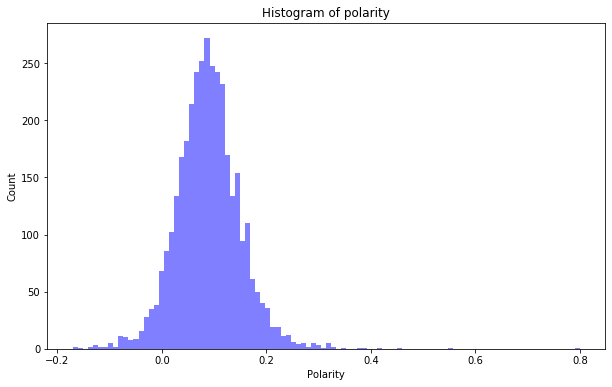

In [13]:
num_bins = 100
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(data.text_Pol, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

In [14]:
# Not needed
'''
#load VADER
analyzer = SentimentIntensityAnalyzer()
#Add VADER metrics to dataframe
data['compound'] = [analyzer.polarity_scores(v)['compound'] for v in data['text']]
data['neg'] = [analyzer.polarity_scores(v)['neg'] for v in data['text']]
data['neu'] = [analyzer.polarity_scores(v)['neu'] for v in data['text']]
data['pos'] = [analyzer.polarity_scores(v)['pos'] for v in data['text']]
data.head(3)
'''

,Unnamed: 0,authors,title,publish_date,description,text,url,text_Pol,text_Subj,desc_Pol,desc_Subj,compound,neg,neu,pos
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,0.039794,0.373132,0.141667,0.325,-0.7584,0.068,0.896,0.036
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...,0.076970,0.486854,0.000000,0.250,0.2991,0.045,0.912,0.043
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,0.028848,0.467386,0.200000,0.200,0.9854,0.075,0.822,0.103


In [15]:
data

,Unnamed: 0,authors,title,publish_date,description,text,url,text_Pol,text_Subj,desc_Pol,desc_Subj,compound,neg,neu,pos
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,0.039794,0.373132,0.141667,0.325000,-0.7584,0.068,0.896,0.036
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...,0.076970,0.486854,0.000000,0.250000,0.2991,0.045,0.912,0.043
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,0.028848,0.467386,0.200000,0.200000,0.9854,0.075,0.822,0.103
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...,0.146606,0.534071,0.500000,0.900000,0.9936,0.058,0.820,0.122
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...,0.111882,0.423282,0.500000,0.900000,0.9858,0.070,0.835,0.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,4604,['The Associated Press'],South Korea declares end to MERS virus outbreak,2015-12-23 09:07:00,South Korea on Wednesday declared a formal end...,South Korea on Wednesday declared a formal end...,https://www.cbc.ca/news/health/korea-mers-outb...,0.001082,0.311039,-0.200000,0.000000,-0.9395,0.130,0.836,0.034
3562,4605,['The Canadian Press'],MERS virus spread in hospitals should be focus...,2014-01-28 16:07:00,The spread of MERS coronavirus infections in h...,The spread of MERS coronavirus infections in h...,https://www.cbc.ca/news/health/mers-virus-spre...,0.113978,0.441041,0.375000,0.875000,-0.9908,0.108,0.835,0.057
3563,4606,['Cbc News'],Ellershausen Manor is for sale,2012-11-02 01:24:00,A clasic old home with a lot of history in now...,"It's a relic of a bygone era, when wealthy Nov...",https://www.cbc.ca/news/canada/nova-scotia/ell...,0.343750,0.775000,0.100000,0.200000,0.4118,0.000,0.910,0.090
3564,4607,['Cbc News'],MERS virus from camels and humans called indis...,2014-04-29 16:57:00,Camels have been implicated in a Middle Easter...,Camels have been implicated in a Middle Easter...,https://www.cbc.ca/news/health/mers-virus-from...,0.153408,0.393682,-0.087879,0.318182,0.9452,0.044,0.893,0.064


In [21]:
def set_sentiment(row):
    if row["text_Pol"] > 0 :
        return "Positive"
    elif row["text_Pol"] == 0:
        return "Neutral"
    else:
        return "Negative"

data = data.assign(Sentiment=data.apply(set_sentiment, axis=1))

print(data)

      Unnamed: 0                   authors  \
0              0              ['Cbc News']   
1              1              ['Cbc News']   
2              2  ['The Associated Press']   
3              3              ['Cbc News']   
4              4              ['Cbc News']   
...          ...                       ...   
3561        4604  ['The Associated Press']   
3562        4605    ['The Canadian Press']   
3563        4606              ['Cbc News']   
3564        4607              ['Cbc News']   
3565        4608    ['The Canadian Press']   

                                                  title         publish_date  \
0     Coronavirus a 'wake-up call' for Canada's pres...  2020-03-27 08:00:00   
1     Yukon gov't names 2 possible sources of corona...  2020-03-27 01:45:00   
2     U.S. Senate passes $2T coronavirus relief package  2020-03-26 05:13:00   
3     Coronavirus: The latest in drug treatment and ...  2020-03-27 00:36:00   
4     The latest on the coronavirus outbreak fo

In [19]:
type(data)

pandas.core.frame.DataFrame

In [20]:
data.head()

,Unnamed: 0,authors,title,publish_date,description,text,url,text_Pol,text_Subj,desc_Pol,desc_Subj,compound,neg,neu,pos,color
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,0.039794,0.373132,0.141667,0.325,-0.7584,0.068,0.896,0.036,Positive
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...,0.076970,0.486854,0.000000,0.250,0.2991,0.045,0.912,0.043,Positive
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,0.028848,0.467386,0.200000,0.200,0.9854,0.075,0.822,0.103,Positive
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...,0.146606,0.534071,0.500000,0.900,0.9936,0.058,0.820,0.122,Positive
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...,0.111882,0.423282,0.500000,0.900,0.9858,0.070,0.835,0.095,Positive


In [22]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Sentiment', y='text_Pol', data=data)
plt.show();

NameError: name 'sns' is not defined

<Figure size 720x432 with 0 Axes>